# Focus on FUR and FCS Transactions  

by Fred Etter - November, 2019

In [1]:
# Import modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Read in the data

df = pd.read_csv('sends.csv', low_memory=False)
df_march = pd.read_csv('march.csv', low_memory=False)
df_april = pd.read_csv('april.csv', low_memory=False)
df_may = pd.read_csv('may.csv', low_memory=False)

In [3]:
# create new dataframs for fcs and fur transactions - JUST FOR MARCH
df_fcs = df_march.loc[df_march['ACTIVITY_TYPE'] == 'FCS']
df_fur = df_march.loc[df_march['ACTIVITY_TYPE'] == 'FUR']

In [4]:
# create a dataframe that captures all transactions for all 3 months
df_t1_all = pd.concat([df_march, df_april], sort=False)
df_t_all = pd.concat([df_t1_all, df_may], sort=False)

In [5]:
# all transactions has almost 5 million rows
df_t_all.shape

(4935216, 21)

In [6]:
# build new dataframe for all months for fcs and fur
df_t_all_fcs = df_t_all.loc[df_t_all['ACTIVITY_TYPE'] == 'FCS']
df_t_all_fur = df_t_all.loc[df_t_all['ACTIVITY_TYPE'] == 'FUR']

In [7]:
# look at sample data for all fcs transactions

pd.set_option('display.max_columns', None)
print(df_t_all_fcs.shape)
df_t_all_fcs.sample(5)

(26971, 21)


,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,ACTIVITY_DATA_5,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30
216667,4v9MMSompGe9awglrPTZ7Q==,US,FCS,2017-05-18 12:46:30,16977,success,0,0,NaN,35.00,USD,PayPal,S,NaN,NaN,NaN,35.00,26.93,31.44,47.59,47.10
313784,ST0QBQDeIim15xl1A%2FXc2A==,US,FCS,2017-03-17 04:28:44,28592,success,0,0,NaN,100.00,USD,MasterCard,S,NaN,NaN,NaN,100.00,80.98,92.85,133.36,130.28
299180,M3MejCEQngKZkArzVWMSmA==,CA,FCS,2017-03-28 15:15:24,19536,success,0,0,NaN,5.00,CAD,Visa,S,NaN,NaN,NaN,3.74,3.00,3.46,5.00,4.90
310593,3AedXCvr68Gha0eWUOvjsw==,IT,FCS,2017-03-09 15:19:02,16977,success,0,0,NaN,15.00,EUR,PayPal,S,NaN,NaN,NaN,15.88,13.04,15.00,21.46,21.15
314274,OYODctknmg6%2FgO2vkuoghg==,US,FCS,2017-03-21 20:59:06,17381,pending,0,0,NaN,35.00,USD,PayPal,S,NaN,NaN,NaN,35.00,28.06,32.42,46.82,45.68


In [8]:
# getting unique supporter_ids for all fcs transactions
df_dd = df_t_all_fcs.drop_duplicates(subset='SUPPORTER_ID')

In [9]:
# This is the number of unique supporters who made a FCS transaction - 22433
df_dd.shape

(22433, 21)

In [10]:
df_t_all.drop_duplicates(subset='SUPPORTER_ID').shape

(1002034, 21)

In [11]:
# create a new dataframe that has all unique supporters who made at least 1 FCS transaction
df1 = pd.DataFrame()

#### Number of FCS transactions by unique supporter:

In [12]:
# create a column that counts number of fcs transaction for each supporter
df1['num_fcs'] = df_t_all_fcs.SUPPORTER_ID.value_counts()

In [13]:
df1.sample(5)

,num_fcs
WeCbnAqgpFCZkArzVWMSmA==,1
X%2BiQEfAhO6azFWMrHGgntg==,1
oTRl02v1igO15xl1A%2FXc2A==,1
dmyaMata7a%2Bq8wJuoPi1Lg==,1
bybjgYBLDnSBKFlzN0740Q==,1


#### FUR or not ?  (1 or 0):

In [14]:
# Add the column 'fur' where it equals 1 if the supporter also contributed monthly (has a FUR transaction)
df1['fur'] = np.where(df1.index.isin(df_t_all_fur.SUPPORTER_ID), 1, 0)

In [15]:
# display number of rows, columns for supporters who made a FCS and FUR transaction
df1.loc[df1['fur'] == 1].shape

(21, 2)

In [16]:
df1.head()

,num_fcs,fur
fa1rLIqTJOAqJI2ZMf1z3w==,33,0
Gva6hUIAKHdkwMmtusGc0w==,27,0
aLBjdFDD64%2BZkArzVWMSmA==,27,0
BytBfCnwrKOZkArzVWMSmA==,11,0
C3wqiKKMT4iZkArzVWMSmA==,11,0


In [17]:
# show number of unique supporters who made at least 1 FCS transaction
df1.shape

(22433, 2)

In [18]:
# show number of supporters who made at least 1 FUR transaction
df_t_all_fur.drop_duplicates(subset='SUPPORTER_ID').shape

(174, 21)

In [19]:
# show number  of FUR transactions
df_t_all_fur.shape

(188, 21)

There are **4935216** total transactions.

There are **1002034** supporters involved in all transactions.

There are **26971** FCS transactions total.

There are **22433** supporters who made a FCS transaction.

There are **188** FUR transactions total.
    - 187 are ACTIVITY_ID 24029 (24029 has no other ACTIVITY_TYPE)
    - 1 is ACTIVITY_ID 15348 (15348 also only has the 1 FUR ACTIVITY_TYPE)

There are **174** supporters who made a FUR transaction.

There are **21** FUR supporters who also made a FCS contribution.  

All FUR transactions are in **GBP** currency.

The following graph shows the number of FUR transactions, number of supporters who made those transactions, and the number of supporters who made both a FCS and FUR transaction.

Text(0.5, 1.0, 'FUR transactions vs FUR unique supporters vs FUR and FCS supporters')

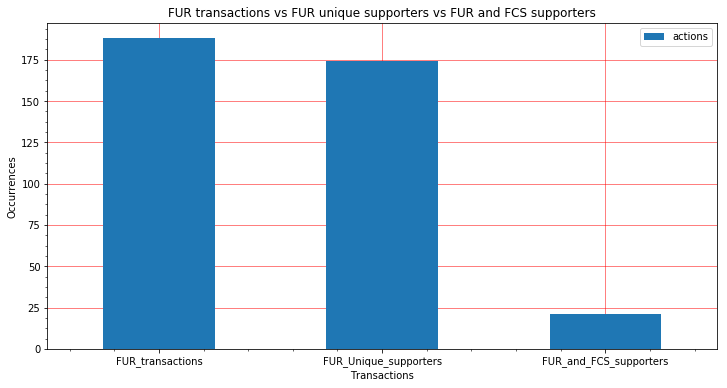

In [20]:
actions = [188, 174, 21]
index = ['FUR_transactions', 'FUR_Unique_supporters', 'FUR_and_FCS_supporters']
df = pd.DataFrame({'actions': actions}, index=index)
ax = df.plot.bar(rot=0, figsize=(12, 6))
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.xlabel("Transactions")
plt.ylabel('Occurrences')
plt.title("FUR transactions vs FUR unique supporters vs FUR and FCS supporters")

#### Maximum FCS transaction:

In [21]:
# add new column to df1 datafram that captures the maximum FCS amount for each supporter
df1['max_fcs'] = df_t_all_fcs.groupby(['SUPPORTER_ID'])['ACTIVITY_DATA_26'].max()

In [22]:
df1.head()

,num_fcs,fur,max_fcs
fa1rLIqTJOAqJI2ZMf1z3w==,33,0,2.31
Gva6hUIAKHdkwMmtusGc0w==,27,0,1.00
aLBjdFDD64%2BZkArzVWMSmA==,27,0,55.00
BytBfCnwrKOZkArzVWMSmA==,11,0,35.00
C3wqiKKMT4iZkArzVWMSmA==,11,0,1.00


In [23]:
# check one supporter to verify the MAX funcion above
df1.loc[df1.index == 'SPGrYS%2FlkdY=']

,num_fcs,fur,max_fcs
SPGrYS%2FlkdY=,3,0,23.13


In [24]:
# check from cell above - note 3rd and 4th row
df_t_all.loc[df_t_all['SUPPORTER_ID'] == 'SPGrYS%2FlkdY=']

,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,ACTIVITY_DATA_5,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30
502,SPGrYS%2FlkdY=,CAN,PET,2017-03-16 21:01:54,37410,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,SPGrYS%2FlkdY=,CAN,PET,2017-03-13 11:33:07,37410,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295764,SPGrYS%2FlkdY=,CAN,FCS,2017-03-17 19:21:40,28592,success,0,0,NaN,30.00,CAD,PayPal,S,NaN,NaN,NaN,22.44,18.10,20.92,30.0,29.13
295765,SPGrYS%2FlkdY=,CAN,FCS,2017-03-19 16:01:36,28592,success,0,0,NaN,31.00,CAD,PayPal,S,NaN,NaN,NaN,23.13,18.54,21.68,31.0,30.43
554,SPGrYS%2FlkdY=,CAN,PET,2017-04-09 21:12:40,37410,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
555,SPGrYS%2FlkdY=,CAN,PET,2017-04-28 21:49:26,37410,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203362,SPGrYS%2FlkdY=,CAN,FCS,2017-05-18 20:29:20,28592,success,0,0,NaN,31.00,CAD,PayPal,S,NaN,NaN,NaN,22.79,17.59,20.51,31.0,30.75


#### Total number of FCS transactions:

In [25]:
# create another column to represent the total FCS money spent per supporter in USD amount
df1['total_fcs'] = df_t_all_fcs.groupby(['SUPPORTER_ID'])['ACTIVITY_DATA_26'].sum()

In [26]:
df1.head()

,num_fcs,fur,max_fcs,total_fcs
fa1rLIqTJOAqJI2ZMf1z3w==,33,0,2.31,61.05
Gva6hUIAKHdkwMmtusGc0w==,27,0,1.00,27.00
aLBjdFDD64%2BZkArzVWMSmA==,27,0,55.00,465.00
BytBfCnwrKOZkArzVWMSmA==,11,0,35.00,60.00
C3wqiKKMT4iZkArzVWMSmA==,11,0,1.00,11.00


#### creating the 'currency' column:

In [27]:
# create a column for currency type
df1 = df1.merge(df_dd[['SUPPORTER_ID', 'ACTIVITY_DATA_5']], left_on=df1.index, right_on='SUPPORTER_ID')

In [28]:
df1.head()

,num_fcs,fur,max_fcs,total_fcs,SUPPORTER_ID,ACTIVITY_DATA_5
0,33,0,2.31,61.05,fa1rLIqTJOAqJI2ZMf1z3w==,AUD
1,27,0,1.00,27.00,Gva6hUIAKHdkwMmtusGc0w==,USD
2,27,0,55.00,465.00,aLBjdFDD64%2BZkArzVWMSmA==,USD
3,11,0,35.00,60.00,BytBfCnwrKOZkArzVWMSmA==,USD
4,11,0,1.00,11.00,C3wqiKKMT4iZkArzVWMSmA==,USD


#### Number of Ps:

In [29]:
# df_fur = df_march.loc[df_march['ACTIVITY_TYPE'] == 'FUR']
df_p = df_t_all.loc[df_t_all['ACTIVITY_STATUS'] == 'P']

In [30]:
# number of rows of all transactions with a 'P'
df_p.shape

(776634, 21)

In [31]:
# group by supporters to get a count for number of Ps per supporter
df_p = df_p.groupby(['SUPPORTER_ID']).count()

In [32]:
df_p.head(5)

,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,ACTIVITY_DATA_5,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30
SUPPORTER_ID,,,,,,,,,,,,,,,,,,,,
%2B%2B%2BtGpmdCBuZkArzVWMSmA==,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
%2B%2B%2Fq5UZ3Q34UHgIT5m4sfA==,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
%2B%2B%2Fq5UZ3Q35kwMmtusGc0w==,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
%2B%2B%2Fq5UZ3Q36%2FgO2vkuoghg==,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
%2B%2B%2Fq5UZ3Q369awglrPTZ7Q==,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
# reset index of df_p dataframe
df_p = df_p.reset_index()

In [34]:
df_p.head()

,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,ACTIVITY_DATA_5,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30
0,%2B%2B%2BtGpmdCBuZkArzVWMSmA==,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,%2B%2B%2Fq5UZ3Q34UHgIT5m4sfA==,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,%2B%2B%2Fq5UZ3Q35kwMmtusGc0w==,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,%2B%2B%2Fq5UZ3Q36%2FgO2vkuoghg==,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,%2B%2B%2Fq5UZ3Q369awglrPTZ7Q==,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
# merge df1 with df_p to get the number of Ps corresponding with the supporter
df1 = df1.merge(df_p[['SUPPORTER_ID', 'ACTIVITY_STATUS']], left_on='SUPPORTER_ID', right_on='SUPPORTER_ID')

In [36]:
df1.head()

,num_fcs,fur,max_fcs,total_fcs,SUPPORTER_ID,ACTIVITY_DATA_5,ACTIVITY_STATUS
0,27,0,1.0,27.0,Gva6hUIAKHdkwMmtusGc0w==,USD,108
1,27,0,55.0,465.0,aLBjdFDD64%2BZkArzVWMSmA==,USD,4
2,11,0,35.0,60.0,BytBfCnwrKOZkArzVWMSmA==,USD,4
3,11,0,1.0,11.0,C3wqiKKMT4iZkArzVWMSmA==,USD,19
4,10,0,0.0,0.0,ZyaXRfHOj%2BiZkArzVWMSmA==,USD,2


In [37]:
# set the new column equal to the ACTIVITY_STATUS column (which is the number of Ps)
df1['num_p'] = df1.ACTIVITY_STATUS

In [38]:
df1.head()

,num_fcs,fur,max_fcs,total_fcs,SUPPORTER_ID,ACTIVITY_DATA_5,ACTIVITY_STATUS,num_p
0,27,0,1.0,27.0,Gva6hUIAKHdkwMmtusGc0w==,USD,108,108
1,27,0,55.0,465.0,aLBjdFDD64%2BZkArzVWMSmA==,USD,4,4
2,11,0,35.0,60.0,BytBfCnwrKOZkArzVWMSmA==,USD,4,4
3,11,0,1.0,11.0,C3wqiKKMT4iZkArzVWMSmA==,USD,19,19
4,10,0,0.0,0.0,ZyaXRfHOj%2BiZkArzVWMSmA==,USD,2,2


In [39]:
# renaming some columns
df1 = df1.rename(columns={'ACTIVITY_DATA_5_x': 'currency', 'SUPPORTER_ID': 'supp_id'})

In [40]:
df1.sample(5)

,num_fcs,fur,max_fcs,total_fcs,supp_id,ACTIVITY_DATA_5,ACTIVITY_STATUS,num_p
5855,1,0,55.00,55.00,EQwS8phY3aqZkArzVWMSmA==,USD,1,1
2572,2,0,19.27,31.50,3sjPoeEp8B%2BZkArzVWMSmA==,GBP,8,8
1432,2,0,37.12,65.13,rF3dVuxKUgYUHgIT5m4sfA==,EUR,5,5
7455,1,0,20.00,20.00,904J2n2mQWeZkArzVWMSmA==,USD,1,1
12394,1,0,12.40,12.40,6Y%2F%2FsI7NvCCZkArzVWMSmA==,GBP,1,1


In [41]:
# drop some unneeded columns
df1.drop(columns=['ACTIVITY_STATUS'], inplace=True)

In [42]:
# renaming some columns
df1 = df1.rename(columns={'ACTIVITY_DATA_5': 'currency'})

In [43]:
df1.head()

,num_fcs,fur,max_fcs,total_fcs,supp_id,currency,num_p
0,27,0,1.0,27.0,Gva6hUIAKHdkwMmtusGc0w==,USD,108
1,27,0,55.0,465.0,aLBjdFDD64%2BZkArzVWMSmA==,USD,4
2,11,0,35.0,60.0,BytBfCnwrKOZkArzVWMSmA==,USD,4
3,11,0,1.0,11.0,C3wqiKKMT4iZkArzVWMSmA==,USD,19
4,10,0,0.0,0.0,ZyaXRfHOj%2BiZkArzVWMSmA==,USD,2


In [44]:
# reordering the columns
df1 = df1[['supp_id', 'num_fcs', 'fur', 'max_fcs', 'total_fcs', 'currency', 'num_p']]

In [45]:
df1.head()

,supp_id,num_fcs,fur,max_fcs,total_fcs,currency,num_p
0,Gva6hUIAKHdkwMmtusGc0w==,27,0,1.0,27.0,USD,108
1,aLBjdFDD64%2BZkArzVWMSmA==,27,0,55.0,465.0,USD,4
2,BytBfCnwrKOZkArzVWMSmA==,11,0,35.0,60.0,USD,4
3,C3wqiKKMT4iZkArzVWMSmA==,11,0,1.0,11.0,USD,19
4,ZyaXRfHOj%2BiZkArzVWMSmA==,10,0,0.0,0.0,USD,2


#### Total transactions:

In [46]:
# create new dataframe for all transactions
df_tt = df_t_all.groupby(['SUPPORTER_ID']).count()

In [47]:
# reset the index
df_tt.reset_index(inplace=True)

In [48]:
# merge df1 with all transactions to get the total transactions
df1 = df1.merge(df_tt[['SUPPORTER_ID', 'ACTIVITY_ID']], left_on='supp_id', right_on='SUPPORTER_ID')

In [49]:
df1.head()

,supp_id,num_fcs,fur,max_fcs,total_fcs,currency,num_p,SUPPORTER_ID,ACTIVITY_ID
0,Gva6hUIAKHdkwMmtusGc0w==,27,0,1.0,27.0,USD,108,Gva6hUIAKHdkwMmtusGc0w==,158
1,aLBjdFDD64%2BZkArzVWMSmA==,27,0,55.0,465.0,USD,4,aLBjdFDD64%2BZkArzVWMSmA==,34
2,BytBfCnwrKOZkArzVWMSmA==,11,0,35.0,60.0,USD,4,BytBfCnwrKOZkArzVWMSmA==,29
3,C3wqiKKMT4iZkArzVWMSmA==,11,0,1.0,11.0,USD,19,C3wqiKKMT4iZkArzVWMSmA==,38
4,ZyaXRfHOj%2BiZkArzVWMSmA==,10,0,0.0,0.0,USD,2,ZyaXRfHOj%2BiZkArzVWMSmA==,22


In [50]:
# renaming some columns
df1 = df1.rename(columns={'ACTIVITY_ID': 'total_trans'})

# drop some columns
df1.drop(columns=['SUPPORTER_ID'], inplace=True)

In [51]:
df1.head()

,supp_id,num_fcs,fur,max_fcs,total_fcs,currency,num_p,total_trans
0,Gva6hUIAKHdkwMmtusGc0w==,27,0,1.0,27.0,USD,108,158
1,aLBjdFDD64%2BZkArzVWMSmA==,27,0,55.0,465.0,USD,4,34
2,BytBfCnwrKOZkArzVWMSmA==,11,0,35.0,60.0,USD,4,29
3,C3wqiKKMT4iZkArzVWMSmA==,11,0,1.0,11.0,USD,19,38
4,ZyaXRfHOj%2BiZkArzVWMSmA==,10,0,0.0,0.0,USD,2,22


In [52]:
# reordering the columns
df1 = df1[['supp_id', 'num_fcs', 'total_trans', 'fur', 'max_fcs', 'total_fcs', 'currency', 'num_p']]

In [53]:
df1.head()

,supp_id,num_fcs,total_trans,fur,max_fcs,total_fcs,currency,num_p
0,Gva6hUIAKHdkwMmtusGc0w==,27,158,0,1.0,27.0,USD,108
1,aLBjdFDD64%2BZkArzVWMSmA==,27,34,0,55.0,465.0,USD,4
2,BytBfCnwrKOZkArzVWMSmA==,11,29,0,35.0,60.0,USD,4
3,C3wqiKKMT4iZkArzVWMSmA==,11,38,0,1.0,11.0,USD,19
4,ZyaXRfHOj%2BiZkArzVWMSmA==,10,22,0,0.0,0.0,USD,2


#### Number of 'formsub' transactions:

In [54]:
# create new df for only 'formsub' actions
df_fs = df_t_all.loc[df_t_all['ACTIVITY_DATA_3'] == 'formsub']

In [55]:
df_fs.head()

,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,ACTIVITY_DATA_5,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30
315531,BDoflNnPHog=,CA,EBC,2017-03-07 09:37:06,154395,R,open,click,formsub,NaN,NaN,NaN,NaN,NaN,131397,NaN,NaN,NaN,NaN,NaN,NaN
315541,kudFmD%2ByF7w=,CAN,EBC,2017-03-06 15:07:12,154395,R,open,click,formsub,NaN,NaN,NaN,NaN,NaN,131397,NaN,NaN,NaN,NaN,NaN,NaN
315556,ALJUUgR5fOs=,CAN,EBC,2017-03-20 10:07:03,159229,R,open,click,formsub,NaN,NaN,NaN,NaN,NaN,136256,NaN,NaN,NaN,NaN,NaN,NaN
315561,nEgT0q6l4MY=,CAN,EBC,2017-03-06 16:28:24,154395,R,open,click,formsub,NaN,NaN,NaN,NaN,NaN,131397,NaN,NaN,NaN,NaN,NaN,NaN
315566,nEgT0q6l4MY=,CAN,EBC,2017-03-20 12:40:05,159229,R,open,click,formsub,NaN,NaN,NaN,NaN,NaN,136256,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# get a count of formsubs by supporter
df_fs = df_fs.groupby(['SUPPORTER_ID']).count()

In [57]:
df_fs.head()

,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,ACTIVITY_DATA_5,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30
SUPPORTER_ID,,,,,,,,,,,,,,,,,,,,
%2B%2B%2BtGpmdCBuZkArzVWMSmA==,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0
%2B%2B0EBm3qo%2BcUHgIT5m4sfA==,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0
%2B%2B1FhQXXKX2ZkArzVWMSmA==,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0
%2B%2B637G3QaaOZkArzVWMSmA==,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0
%2B%2B7DPGIjppsqJI2ZMf1z3w==,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0


In [58]:
# reset the index
df_fs.reset_index(inplace=True)

In [59]:
# merge df1 with df_fs to get the number of 'formsub' transactions by supporter
df1 = df1.merge(df_fs[['SUPPORTER_ID', 'ACTIVITY_DATA_3']], left_on='supp_id', right_on='SUPPORTER_ID')

In [60]:
df1.head()

,supp_id,num_fcs,total_trans,fur,max_fcs,total_fcs,currency,num_p,SUPPORTER_ID,ACTIVITY_DATA_3
0,Gva6hUIAKHdkwMmtusGc0w==,27,158,0,1.0,27.00,USD,108,Gva6hUIAKHdkwMmtusGc0w==,3
1,BytBfCnwrKOZkArzVWMSmA==,11,29,0,35.0,60.00,USD,4,BytBfCnwrKOZkArzVWMSmA==,1
2,ZyaXRfHOj%2BiZkArzVWMSmA==,10,22,0,0.0,0.00,USD,2,ZyaXRfHOj%2BiZkArzVWMSmA==,7
3,O%2FSV5ONZIxiZkArzVWMSmA==,8,10,0,25.0,131.00,USD,1,O%2FSV5ONZIxiZkArzVWMSmA==,1
4,26D%2B9fXgFTeZkArzVWMSmA==,8,32,0,12.4,62.71,GBP,5,26D%2B9fXgFTeZkArzVWMSmA==,2


In [61]:
# drop some columns
df1.drop(columns=['SUPPORTER_ID'], inplace=True)

In [62]:
# renaming some columns
df1 = df1.rename(columns={'ACTIVITY_DATA_3': 'num_fs'})

In [63]:
df1.head()

,supp_id,num_fcs,total_trans,fur,max_fcs,total_fcs,currency,num_p,num_fs
0,Gva6hUIAKHdkwMmtusGc0w==,27,158,0,1.0,27.00,USD,108,3
1,BytBfCnwrKOZkArzVWMSmA==,11,29,0,35.0,60.00,USD,4,1
2,ZyaXRfHOj%2BiZkArzVWMSmA==,10,22,0,0.0,0.00,USD,2,7
3,O%2FSV5ONZIxiZkArzVWMSmA==,8,10,0,25.0,131.00,USD,1,1
4,26D%2B9fXgFTeZkArzVWMSmA==,8,32,0,12.4,62.71,GBP,5,2


#### Number of clicks:

In [64]:
# create new df with just transactions with a click
df_c = df_t_all.loc[df_t_all['ACTIVITY_DATA_2'] == 'click']

In [65]:
df_c.head()

,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,ACTIVITY_DATA_5,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30
315531,BDoflNnPHog=,CA,EBC,2017-03-07 09:37:06,154395,R,open,click,formsub,NaN,NaN,NaN,NaN,NaN,131397,NaN,NaN,NaN,NaN,NaN,NaN
315541,kudFmD%2ByF7w=,CAN,EBC,2017-03-06 15:07:12,154395,R,open,click,formsub,NaN,NaN,NaN,NaN,NaN,131397,NaN,NaN,NaN,NaN,NaN,NaN
315545,kudFmD%2ByF7w=,CAN,EBC,2017-03-13 12:37:17,158828,R,open,click,NaN,NaN,NaN,NaN,NaN,NaN,135857,NaN,NaN,NaN,NaN,NaN,NaN
315554,ALJUUgR5fOs=,CAN,EBC,2017-03-06 15:10:05,154395,R,open,click,NaN,NaN,NaN,NaN,NaN,NaN,131397,NaN,NaN,NaN,NaN,NaN,NaN
315556,ALJUUgR5fOs=,CAN,EBC,2017-03-20 10:07:03,159229,R,open,click,formsub,NaN,NaN,NaN,NaN,NaN,136256,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
# groupby supporter_id to ge a count by supporter
df_c = df_c.groupby(['SUPPORTER_ID']).count()

In [67]:
df_c.sample(5)

,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,ACTIVITY_DATA_5,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30
SUPPORTER_ID,,,,,,,,,,,,,,,,,,,,
wDEL0%2BalKXyZkArzVWMSmA==,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0
gbxZHu7C4IWZkArzVWMSmA==,4,4,4,4,4,4,4,4,0,0,0,0,0,4,0,0,0,0,0,0
YEY%2FYh%2BGdvK15xl1A%2FXc2A==,2,2,2,2,2,2,2,2,0,0,0,0,0,2,0,0,0,0,0,0
Oy7gU7u1SEizFWMrHGgntg==,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0
oUc1VE2mTSyZkArzVWMSmA==,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0


In [68]:
# reset index
df_c.reset_index(inplace=True)

In [69]:
# merge df1 with df_c to get a datafram with number of clicks for each supporter who made a FCS transaction
df1 = df1.merge(df_c[['SUPPORTER_ID', 'ACTIVITY_DATA_2']], left_on='supp_id', right_on='SUPPORTER_ID')

In [70]:
df1.head()

,supp_id,num_fcs,total_trans,fur,max_fcs,total_fcs,currency,num_p,num_fs,SUPPORTER_ID,ACTIVITY_DATA_2
0,Gva6hUIAKHdkwMmtusGc0w==,27,158,0,1.0,27.00,USD,108,3,Gva6hUIAKHdkwMmtusGc0w==,6
1,BytBfCnwrKOZkArzVWMSmA==,11,29,0,35.0,60.00,USD,4,1,BytBfCnwrKOZkArzVWMSmA==,1
2,ZyaXRfHOj%2BiZkArzVWMSmA==,10,22,0,0.0,0.00,USD,2,7,ZyaXRfHOj%2BiZkArzVWMSmA==,8
3,O%2FSV5ONZIxiZkArzVWMSmA==,8,10,0,25.0,131.00,USD,1,1,O%2FSV5ONZIxiZkArzVWMSmA==,1
4,26D%2B9fXgFTeZkArzVWMSmA==,8,32,0,12.4,62.71,GBP,5,2,26D%2B9fXgFTeZkArzVWMSmA==,3


In [71]:
# drop some columns
df1.drop(columns=['SUPPORTER_ID'], inplace=True)

In [72]:
# renaming some columns
df1 = df1.rename(columns={'ACTIVITY_DATA_2': 'num_c'})

In [73]:
df1.head()

,supp_id,num_fcs,total_trans,fur,max_fcs,total_fcs,currency,num_p,num_fs,num_c
0,Gva6hUIAKHdkwMmtusGc0w==,27,158,0,1.0,27.00,USD,108,3,6
1,BytBfCnwrKOZkArzVWMSmA==,11,29,0,35.0,60.00,USD,4,1,1
2,ZyaXRfHOj%2BiZkArzVWMSmA==,10,22,0,0.0,0.00,USD,2,7,8
3,O%2FSV5ONZIxiZkArzVWMSmA==,8,10,0,25.0,131.00,USD,1,1,1
4,26D%2B9fXgFTeZkArzVWMSmA==,8,32,0,12.4,62.71,GBP,5,2,3


#### Some additional analysis....

In [74]:
# display the number of unique supporter IDs from all transaction data:
df_t_all.ACTIVITY_ID.nunique()

1144

As shown above, the total number of activity IDs for the transaction data is **1144**.  This contrasts significantly with the number of unique activity IDs for the sends broadcast data in March of **43**.

In [75]:
# This is the lone FUR supporter who does not have the 24029 ACTIVITY_ID (this person only has 1 transaction)
df_t_all.loc[df_t_all['ACTIVITY_ID'] == 15348].shape

(1, 21)

In the cell above, just checking to see all of the transactions for activity ID 15348.  This was the one activity ID that had a FUR transaction that was not activity ID number 24029.

In [76]:
# show those supporters who made a single donation and those who made a rucurring donation as well (fur = 1)
df1.loc[df1['fur'] == 1]

,supp_id,num_fcs,total_trans,fur,max_fcs,total_fcs,currency,num_p,num_fs,num_c
16,hZftL2QRnjKZkArzVWMSmA==,5,25,1,13.01,51.01,GBP,7,5,7
1173,kGH9cswxSAmZkArzVWMSmA==,2,15,1,6.52,12.77,GBP,1,2,3
1485,ClQYL8SRocAUHgIT5m4sfA==,2,12,1,32.34,45.28,GBP,6,2,2
1732,V73wWbQguZuZkArzVWMSmA==,2,14,1,6.48,6.48,GBP,9,1,1
1829,xW4XUujQsJyzFWMrHGgntg==,2,23,1,12.47,12.47,GBP,2,4,4
2147,sSGzNaMHa6aha0eWUOvjsw==,2,24,1,30.60,50.64,GBP,10,2,2
3455,7304B%2Bq6esmZkArzVWMSmA==,1,7,1,24.79,24.79,GBP,2,1,1
5283,mO%2FEO9gbG%2BWzFWMrHGgntg==,1,27,1,3.65,3.65,GBP,4,4,6
5393,aFP1HmfMKoGha0eWUOvjsw==,1,24,1,12.48,12.48,GBP,3,4,5
6252,sYywsBcB6gEqJI2ZMf1z3w==,1,22,1,12.46,12.46,GBP,5,2,5


Something to note in the above dataframe:  the total transactions for all of these supporters is a high number.

In [77]:
df1.total_trans.describe()

count    9957.000000
mean       14.536808
std         7.689156
min         3.000000
25%         9.000000
50%        14.000000
75%        20.000000
max       158.000000
Name: total_trans, dtype: float64

In [78]:
df1.loc[df1['fur'] == 1].total_trans.describe()

count    16.000000
mean     21.062500
std       6.786936
min       7.000000
25%      14.750000
50%      23.500000
75%      25.000000
max      33.000000
Name: total_trans, dtype: float64

As shown above, the mean number of transactions for all FCS supporters is **14.5**, whereas the mean number of FCS supporters who also made a recurring donation (FUR) is **21.1**.

# Conclusion  

I wanted to use the dataframe below to perform machine learning / predictive analytics to try to find correlations between supporters who made FCS donations and those who made FUR donations.

However, there are only **21** supporters who made a FCS and FUR donation (from Cell number 15 above).  This is 21 supporters out of a total of **22433** (from cell 17) who made a FCS transaction.  This seems like too little data to run a ML algorithm.

Regardless, the framework / code is here to add to the dataframe below by creating more columns as needed.  See the dataframe below: 

In [79]:
df1.head(15)

,supp_id,num_fcs,total_trans,fur,max_fcs,total_fcs,currency,num_p,num_fs,num_c
0,Gva6hUIAKHdkwMmtusGc0w==,27,158,0,1.00,27.00,USD,108,3,6
1,BytBfCnwrKOZkArzVWMSmA==,11,29,0,35.00,60.00,USD,4,1,1
2,ZyaXRfHOj%2BiZkArzVWMSmA==,10,22,0,0.00,0.00,USD,2,7,8
3,O%2FSV5ONZIxiZkArzVWMSmA==,8,10,0,25.00,131.00,USD,1,1,1
4,26D%2B9fXgFTeZkArzVWMSmA==,8,32,0,12.40,62.71,GBP,5,2,3
5,IvP0sjovDmcUHgIT5m4sfA==,7,22,0,2.24,8.24,USD,3,5,5
6,aSenO6UEKN%2BzFWMrHGgntg==,7,28,0,11.24,76.16,EUR,5,7,8
7,ETECe8xac7CZkArzVWMSmA==,6,21,0,5.00,30.00,USD,12,1,1
8,Qgs8fytFBaiZkArzVWMSmA==,6,45,0,0.00,0.00,USD,4,4,8
9,2VPzadxilIkUHgIT5m4sfA==,6,18,0,35.00,175.00,USD,1,4,4


The above dataframe has all unique supporters who made a FCS transaction.  The columns are as follows:

  - supp_id = SUPPORTER_ID who made a FCS transaction
  - num_fcs = number of FCS transactions total
  - fur = if supporter made at least 1 FUR transaction, a 1 is placed, otherwise 0
  - max_fcs = maximum FCS contribution amount in USD
  - total_fcs = total FCS contribution amount in USD
  - total_trans = total number of transactions made by that supporter
  - currency = currency of donation
  - num_p = number of 'P' transactions by the supporter
  - num_fs = number of 'formsub' transactions by the supporter
  - num_c = number of 'click' transactions by the supporter